In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# inspiration de lmfit

https://lmfit.github.io/lmfit-py/confidence.html


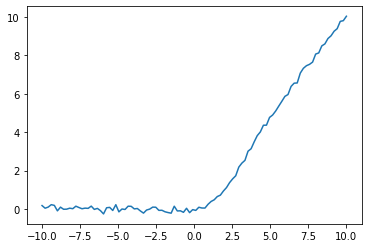

In [3]:

x = np.linspace(-10, 10, 100)
np.random.seed(0)
#y = 1/(0.1*x) + 2 
y = x * 1/(1 + 2.*np.exp(-(x-1.2)))

y += 0.1*np.random.randn(x.size)

plt.plot(x, y)

In [6]:
import lmfit
pars = lmfit.Parameters()
pars.add_many(('a', 0.1), ('b', 4))


def residual(p):
    model = x  /(1 + p['b'] * np.exp(-(x-p['a'])))

    return model - y

In [7]:
mini = lmfit.Minimizer(residual, pars)
result = mini.minimize()

In [8]:
result

In [9]:
print(lmfit.fit_report(result.params))

[[Variables]]
    a:  2.07174586 +/- 350036.328 (16895717.48%) (init = 0.1)
    b:  0.90476768 +/- 316701.558 (35003633.12%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -1.000


In [ ]:
ci = lmfit.conf_interval(mini, result)
lmfit.printfuncs.report_ci(ci)

In [15]:
result.params['a'].value

0.46764788240568

# obtenir une variabilité

une idée: 

* introduires des Nans dans les données
* faire une boucle dans laquelle:
 * on ajoute du bruit dans les conditions initiales
 * on refait le fit
* la variabilité devrait dépendre 

In [16]:
N_test = 200
As = []

for i_test in range(N_test):
    pars = lmfit.Parameters()
    pars.add_many(('a', 0.1+0.1*np.random.randn()), ('b', 4+0.1*np.random.randn()))
    
    mini = lmfit.Minimizer(residual, pars)
    result = mini.minimize()

    As.append(result.params['a'].value)
    
print(np.mean(As), np.std(As))

0.46900842622104905 0.7101565311237605


In [17]:
As

[-0.391971950022915,
 1.0780173485702247,
 0.8740405860395647,
 -0.4430756532115653,
 0.2882435253822346,
 1.022370842220798,
 -0.43931946711931974,
 0.9685237824705697,
 1.2234816649082818,
 -0.330272697626951,
 -0.3476795931542471,
 1.2528600032424013,
 -0.43492942867978057,
 1.4520208361526477,
 0.5070220469678252,
 1.0457732640498232,
 1.233059720216864,
 0.9275068075170465,
 0.8122856443749134,
 0.880128953403025,
 -0.43970985727990464,
 1.2795068988781846,
 0.2910960106592321,
 0.9982305735671604,
 1.3268823406274073,
 0.1808919917793,
 1.2351217636545786,
 0.32909008511777865,
 0.9467722422034545,
 0.785265037818057,
 1.2205474288795042,
 -0.05221520143578223,
 1.0059602359252524,
 -0.4520666996379578,
 1.0245665538633524,
 1.113752719238765,
 1.2921363079791264,
 1.2396356083048414,
 -0.5859521401115869,
 0.99523203496962,
 0.22363013604038914,
 0.5396078688927962,
 1.0006690501032889,
 -0.37432349422560957,
 0.9758992542676765,
 0.47688291148450945,
 -0.7083118426750041,
 1.28